In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('../datasets/covid_worldwide.csv')
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


**Is there any missing data? If so, perform missing data treatment of your choice.**

In [100]:
df.isna()
df.fillna(-1,inplace=True)
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,-1,-1
227,228,Vatican City,29,-1,29,0,-1,799
228,229,Western Sahara,10,1,9,0,-1,"626,161"
229,230,MS Zaandam,9,2,7,0,-1,-1


**What are the data types? Looks like most of the numeric columns need to be changed. Convert them to floats and integers as necessary.**

In [12]:
df.dtypes

Serial Number       int64
Country            object
Total Cases        object
Total Deaths       object
Total Recovered    object
Active Cases       object
Total Test         object
Population         object
dtype: object

In [101]:
def convert_to_int(df): 
    l=[]
    for i in df.astype(str):
        l.append(int(i.replace(',','')))
    return l

df['Total Cases']=convert_to_int(df['Total Cases'])
df['Total Deaths']=convert_to_int(df['Total Deaths'])
df['Total Recovered']=convert_to_int(df['Total Recovered'])
df['Active Cases']=convert_to_int(df['Active Cases'])
df['Total Test']=convert_to_int(df['Total Test'])
df['Population']=convert_to_int(df['Population'])

df['Total Cases'].astype('int64')
df['Total Deaths'].astype('int64')
df['Total Recovered'].astype('int64')
df['Active Cases'].astype('int64')
df['Total Test'].astype('int64')
df['Population'].astype('int64')

0       334805269
1      1406631776
2        65584518
3        83883596
4       215353593
          ...    
226            -1
227           799
228        626161
229            -1
230          1378
Name: Population, Length: 231, dtype: int64

**How many different countries had the virus?**

In [32]:
len(df['Country'].unique())

231

**Create a geographical plot of the distribution of deaths from around the world.**

In [46]:
df.groupby('Country')['Total Deaths'].sum()

Country
Afghanistan          7882
Albania              3595
Algeria              6881
Andorra               165
Angola               1931
                     ... 
Wallis and Futuna       7
Western Sahara          1
Yemen                2159
Zambia               4047
Zimbabwe             5652
Name: Total Deaths, Length: 231, dtype: int64

**What are the top 5 countries in active cases?**

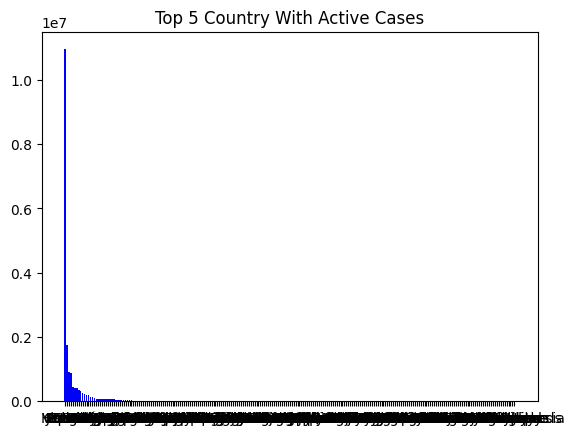

In [71]:
new_df=df.groupby('Country')['Active Cases'].sum().sort_values(ascending=False).head()
plt.bar(new_df.index,new_df.values,color='b')
plt.title('Top 5 Country With Active Cases')
plt.show()

**What are the top 5 countries in total recoveries?**

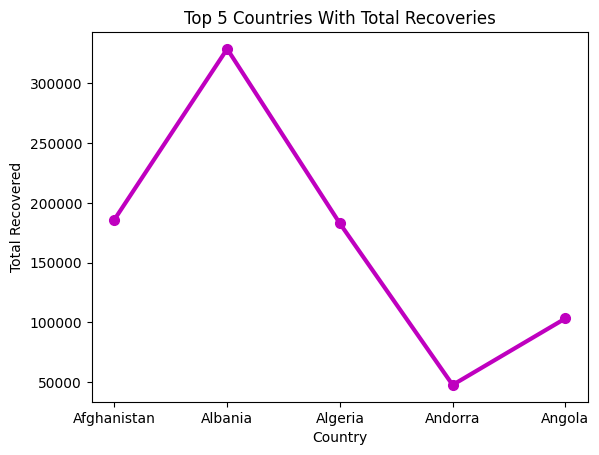

In [74]:
new_df=df.groupby('Country')['Total Recovered'].sum().head(5)
plt.plot(new_df.index, new_df.values, color = "m", marker = "o", linewidth = 3,markersize = 7)
plt.title('Top 5 Countries With Total Recoveries')
plt.xlabel('Country')
plt.ylabel('Total Recovered')
plt.show()

**Create your own question and answer it.**

In [104]:
#Top 5 Countries with largest population.
df.nlargest(5,"Population")

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
1,2,India,44682784,530740,44150289,1755,915265788,1406631776
0,1,USA,104196861,1132935,101322779,1741147,1159832679,334805269
19,20,Indonesia,6730289,160817,6565208,4264,114158919,279134505
52,53,Pakistan,1576313,30640,1538689,6984,30570862,229488994
107,108,Nigeria,266463,3155,259850,3458,5708974,216746934


In [118]:
# Statistics for dataset
df.describe()

,Serial Number,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
count,231.000000,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02,2.310000e+02
mean,116.000000,2.923460e+06,2.927703e+04,2.721732e+06,8.351401e+04,2.996123e+07,2.812322e+07
std,66.828138,9.479286e+06,1.041073e+05,9.116089e+06,7.344789e+05,1.133726e+08,1.016625e+08
min,1.000000,5.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,58.500000,2.400100e+04,1.795000e+02,1.208250e+04,1.850000e+01,2.260585e+05,4.063530e+05
50%,116.000000,2.065920e+05,1.965000e+03,1.315590e+05,7.390000e+02,1.671684e+06,5.511370e+06
75%,173.500000,1.296146e+06,1.390850e+04,1.255186e+06,9.328500e+03,1.148478e+07,2.152480e+07
max,231.000000,1.041969e+08,1.132935e+06,1.013228e+08,1.095262e+07,1.159833e+09,1.406632e+09


In [120]:
df.corr(numeric_only=True)

,Serial Number,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
Serial Number,1.000000,-0.459133,-0.406140,-0.445685,-0.171534,-0.380645,-0.293419
Total Cases,-0.459133,1.000000,0.878769,0.990231,0.346931,0.841575,0.527981
Total Deaths,-0.406140,0.878769,1.000000,0.883873,0.162793,0.794367,0.577434
Total Recovered,-0.445685,0.990231,0.883873,1.000000,0.279439,0.844724,0.529768
Active Cases,-0.171534,0.346931,0.162793,0.279439,1.000000,0.152165,0.104621
Total Test,-0.380645,0.841575,0.794367,0.844724,0.152165,1.000000,0.664800
Population,-0.293419,0.527981,0.577434,0.529768,0.104621,0.664800,1.000000


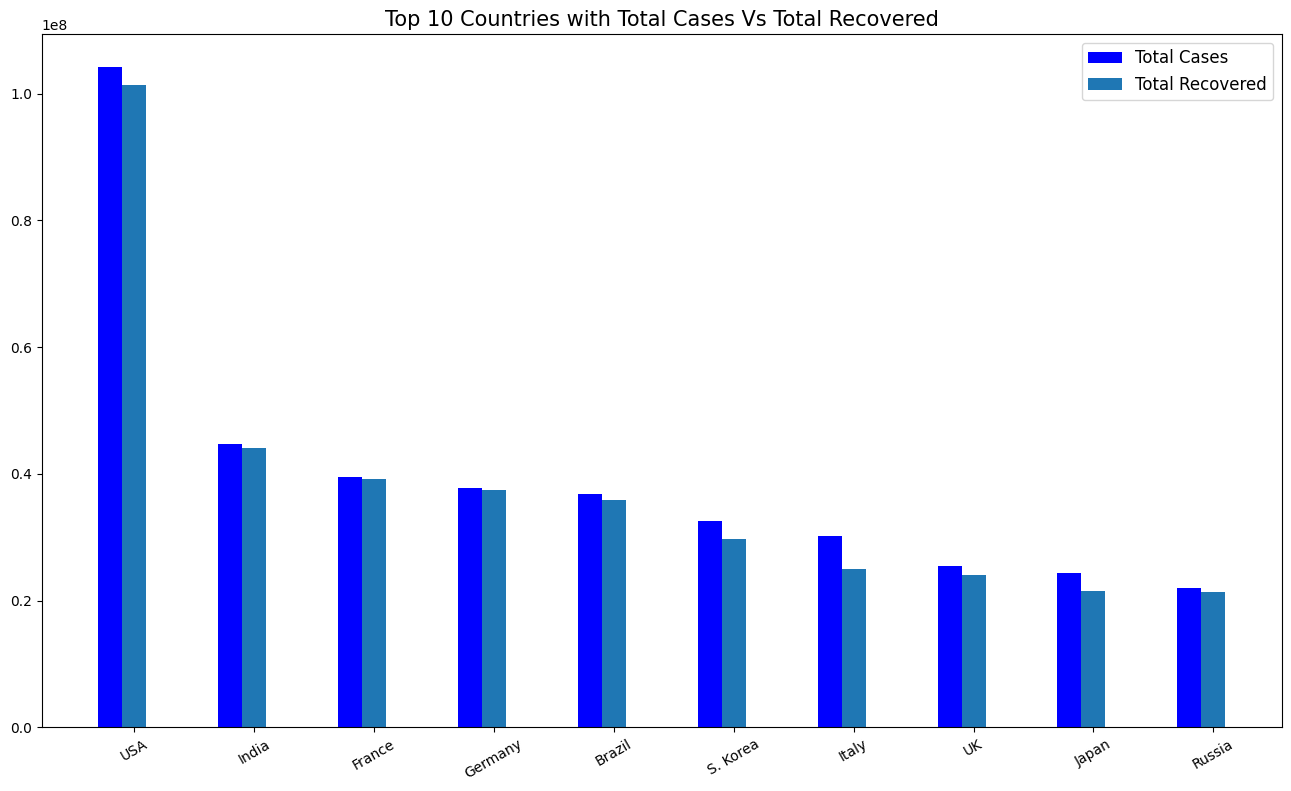

In [131]:
plt.figure(figsize=(16,9))
total_cases=df.groupby('Country')['Total Cases'].sum().sort_values(ascending=False).head(10)
total_recovered=df.groupby('Country')['Total Recovered'].sum().sort_values(ascending=False).head(10)
i=np.arange(len(total_cases.index))
plt.bar(i,total_cases.values,0.2,color = "b")
plt.bar(i+0.2,total_recovered.values,0.2)
plt.xticks(i+width,total_recovered.index,rotation=30)
plt.title('Top 10 Countries with Total Cases Vs Total Recovered',fontsize=15)
plt.legend(['Total Cases','Total Recovered'],fontsize=12)
plt.show()

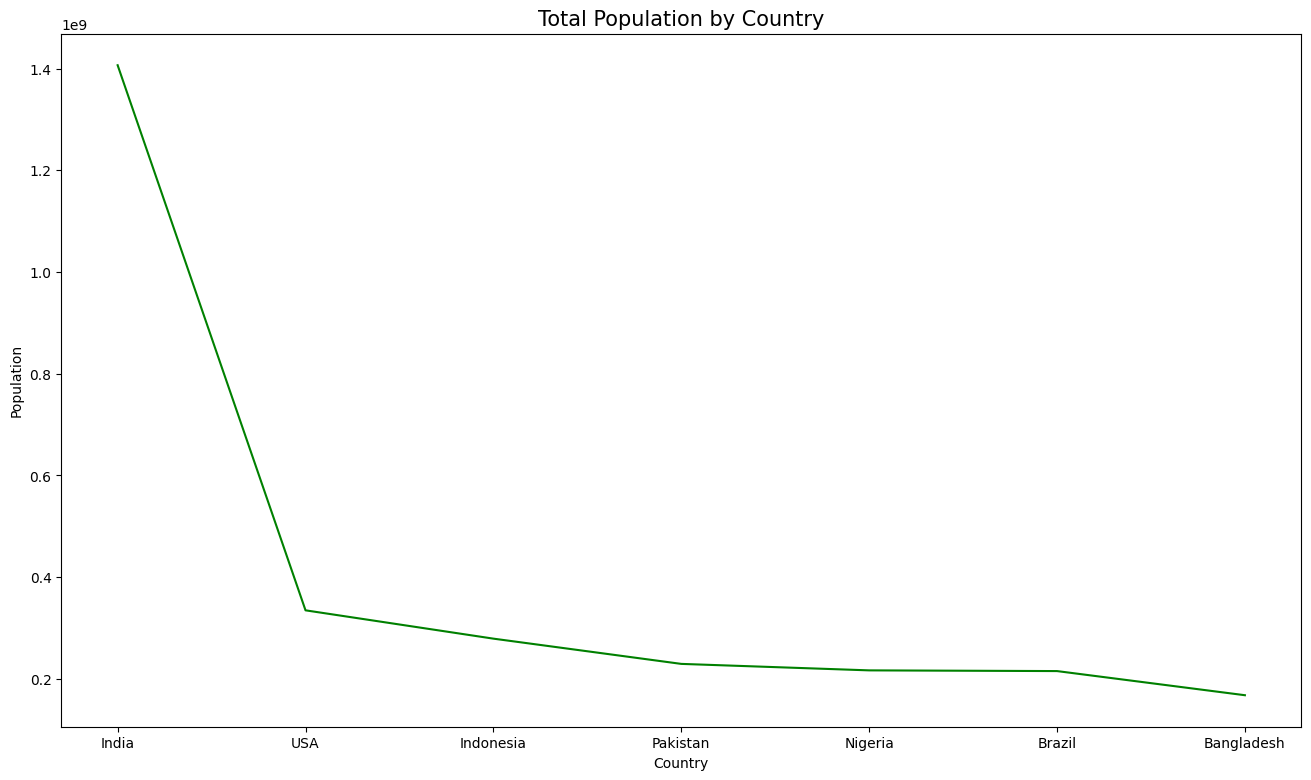

In [147]:
plt.figure(figsize=(16,9))
population=df.groupby('Country')['Population'].sum().sort_values(ascending=False).head(7)
sns.lineplot(x=population.index,y=population.values,data=population,color='g')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Total Population by Country',fontsize=15)
plt.show()

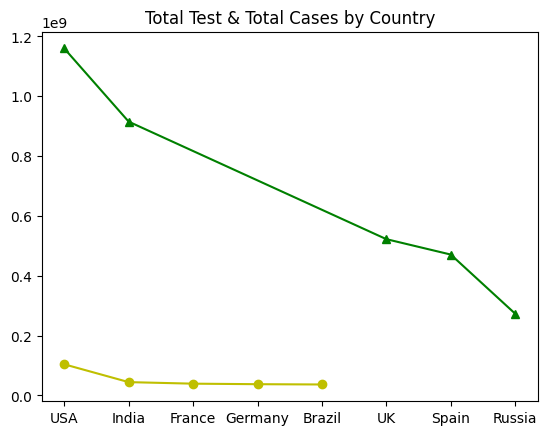

In [152]:
total_cases=df.groupby('Country')['Total Cases'].sum().sort_values(ascending=False).head()
total_test=df.groupby('Country')['Total Test'].sum().sort_values(ascending=False).head()

plt.plot(total_cases.index,total_cases.values,color='y',marker='o')
plt.plot(total_test.index,total_test.values,color='g',marker='^')
plt.title('Total Test & Total Cases by Country')
plt.show()

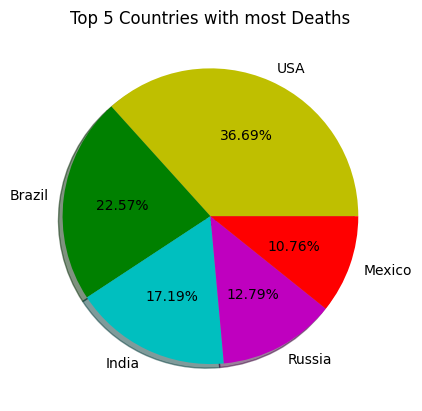

In [163]:
total_deaths=df.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head()
plt.pie(total_deaths.values,labels=total_deaths.index,colors=['y','g','c','m','r'],autopct='%0.2f%%',shadow=True,textprops ={"fontsize":10,"color":'k'})
plt.title('Top 5 Countries with most Deaths')
#plt.legend(total_deaths.index)
plt.show()

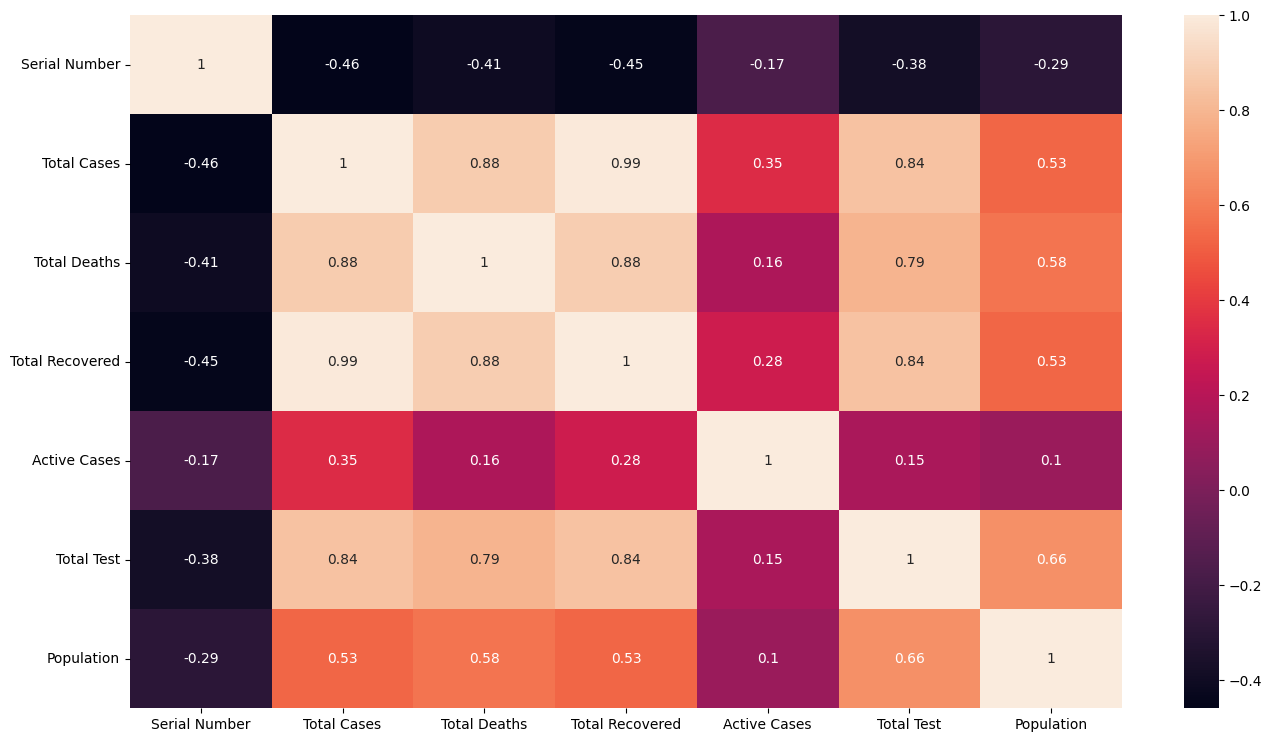

In [167]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(numeric_only=True), annot = True)
plt.show()